In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

EDA

<AxesSubplot:xlabel='TV', ylabel='sales'>

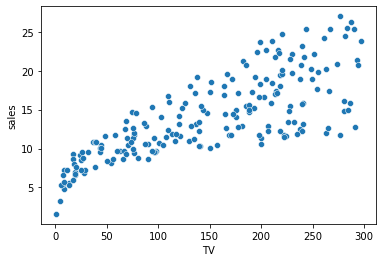

In [34]:
sns.scatterplot(x='TV', y='sales',data=df)

We can observe sales increases as money investment in TV increases. 

<AxesSubplot:xlabel='radio', ylabel='sales'>

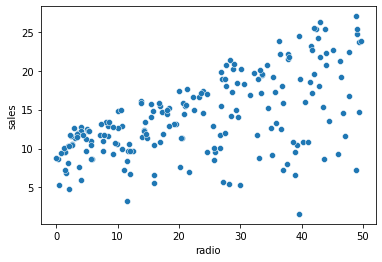

In [27]:
sns.scatterplot(x='radio', y='sales',data=df)

We can observe sales increases as investment in radio increases.  

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

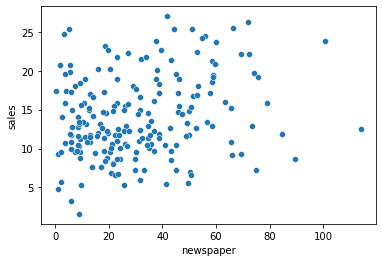

In [35]:
sns.scatterplot(x='newspaper', y='sales',data=df)

we can observe newspaper requires less investment and sales is also not as good as TV and radio.

In [37]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

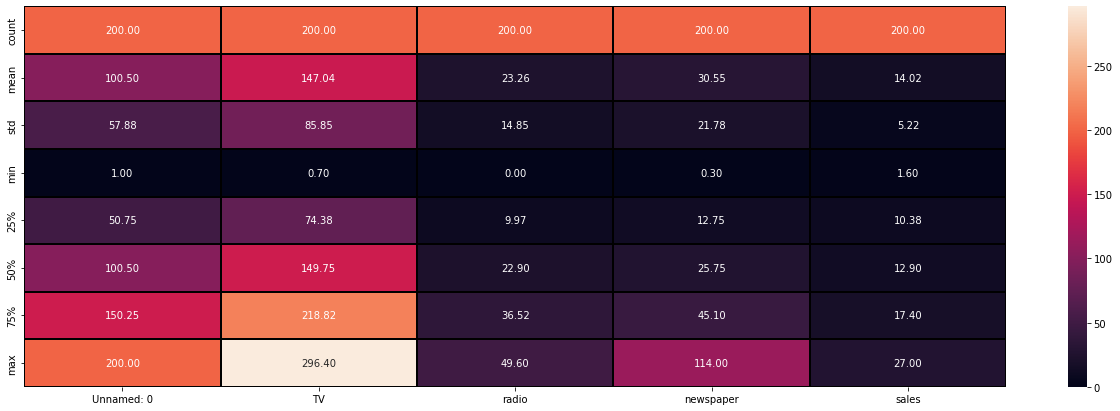

In [38]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [43]:
df_new=df.drop(["Unnamed: 0"],axis=1)
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Correlation of the columns with Target column

In [44]:
df_new.corr()['sales'].sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

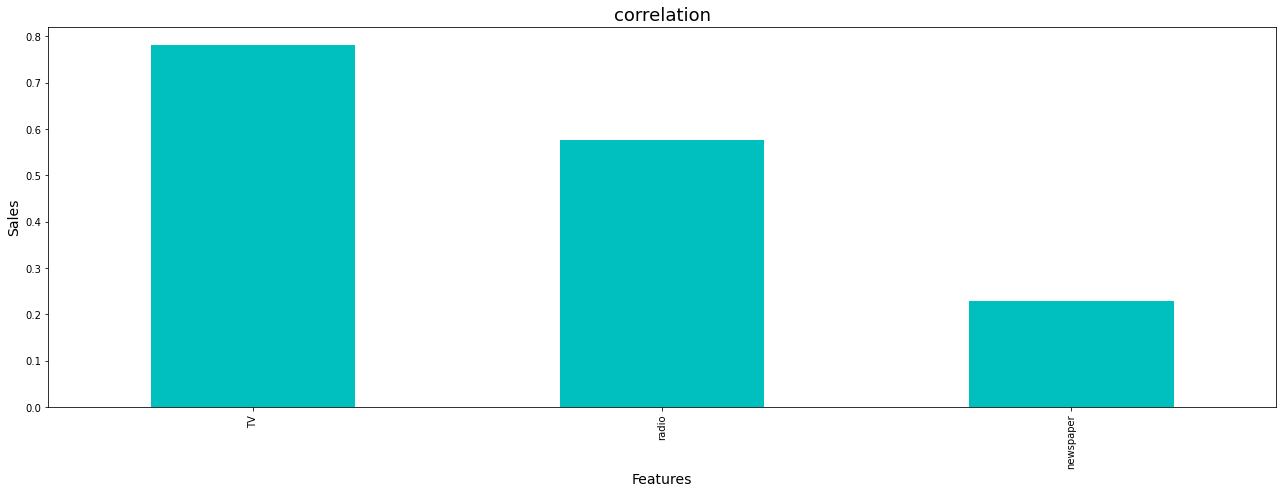

In [47]:
plt.figure(figsize=(22,7))
df_new.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Outliers check

<AxesSubplot:>

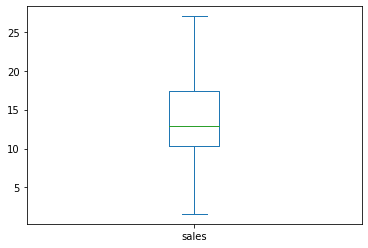

In [48]:
df['sales'].plot.box()

<AxesSubplot:>

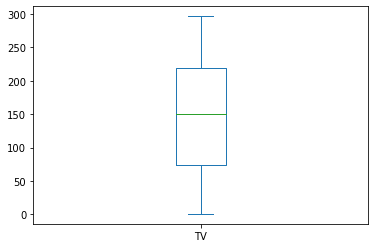

In [49]:
df['TV'].plot.box()

<AxesSubplot:>

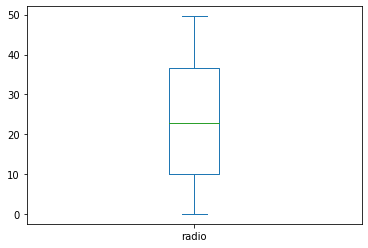

In [50]:
df['radio'].plot.box()

<AxesSubplot:>

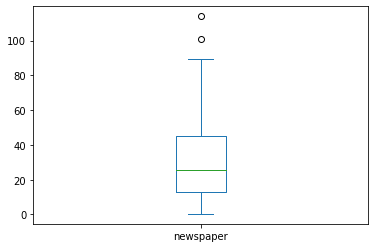

In [51]:
df['newspaper'].plot.box()

Removing outliers

In [54]:
z=np.abs(zscore(df_new))
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [55]:
df_new_z = df_new[(z<3).all(axis=1)]
df_new_z

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [56]:
df_new_z.shape

(198, 4)

Percentage data loss

In [57]:
Data_loss=((200-198)/200)*100
Data_loss

1.0

Checking Multicolinearity

In [61]:
x = df_new_z.drop(['sales'],axis=1)
y = df_new_z['sales']

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [63]:
X_scaled

array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

In [65]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = x.columns

vif

,vif,Features
0,1.003863,TV
1,1.137887,radio
2,1.137631,newspaper


All the VIF values are less than 5 and very low. This means no multicollinearity present.

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At randon state{i}, the training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At randon state{i}, the testing accuracy is: {r2_score(y_test,pred_test)}")
    print("\n")

At randon state0, the training accuracy is: 0.8898322019518987
At randon state0, the testing accuracy is: 0.9098946359000557


At randon state1, the training accuracy is: 0.8946050839431845
At randon state1, the testing accuracy is: 0.891219907737298


At randon state2, the training accuracy is: 0.9105689646648081
At randon state2, the testing accuracy is: 0.8381266733637571


At randon state3, the training accuracy is: 0.8944143192604463
At randon state3, the testing accuracy is: 0.8980994665131535


At randon state4, the training accuracy is: 0.8981805823414822
At randon state4, the testing accuracy is: 0.8719021920124683


At randon state5, the training accuracy is: 0.8994368014551729
At randon state5, the testing accuracy is: 0.8616494043950311


At randon state6, the training accuracy is: 0.8993028842288798
At randon state6, the testing accuracy is: 0.8760639888444909


At randon state7, the training accuracy is: 0.8907422790206732
At randon state7, the testing accuracy is: 0.9072

In [71]:
lr.fit(x_train,y_train)

LinearRegression()

In [72]:
pred_test=lr.predict(x_test)

In [73]:
print(r2_score(y_test,pred_test))

0.9300192208914474


Cross Validation

In [79]:
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")


At cross fold 2 the cv score is 0.8886177292201752 and accuracy score for training is 0.8832087051413472 and accuracy for the testing is 0.9300192208914474


At cross fold 3 the cv score is 0.8890406332045909 and accuracy score for training is 0.8832087051413472 and accuracy for the testing is 0.9300192208914474


At cross fold 4 the cv score is 0.8880501918930908 and accuracy score for training is 0.8832087051413472 and accuracy for the testing is 0.9300192208914474


At cross fold 5 the cv score is 0.8853605756683912 and accuracy score for training is 0.8832087051413472 and accuracy for the testing is 0.9300192208914474


At cross fold 6 the cv score is 0.8868174285063072 and accuracy score for training is 0.8832087051413472 and accuracy for the testing is 0.9300192208914474


At cross fold 7 the cv score is 0.8838282894864758 and accuracy score for training is 0.8832087051413472 and accuracy for the testing is 0.9300192208914474


At cross fold 8 the cv score is 0.8880334554150218 a

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [81]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001,.001,.01,.1,1,10],
             'random_state':list(range(0,10))}

ls = Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [82]:
#final model training
ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

88.30088655803894

In [83]:
pred_ls = ls.predict(x_test)

In [84]:
lss = r2_score(y_test,pred_ls)
lss*100

92.72254559437019

In [85]:
cv_score = cross_val_score(ls,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean*100

88.66337793995942

Ensemble Technique

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2']}

rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [87]:
rf = RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('r2_score', rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Sacore', rfc*100)

r2_score 97.93726075600917
Cross Val Sacore 97.81058675343334
